In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from pgmpy.factors.discrete import DiscreteFactor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from pgmpy.models import FactorGraph
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation

import joblib
import os

data source : [source link here](https://www.kaggle.com/datasets/shashwatwork/web-page-phishing-detection-dataset/code)

## Data Preprocessing

In [74]:
data = pd.read_csv("../data/dataset_phishing.csv")

In [120]:
text_data=pd.read_csv("../data/Dataset_5971.csv")

In [27]:
pd.set_option('display.max_columns', None)

In [28]:
data.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.000000,0,0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.000000,0,0,0,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.000000,0,0,0,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.500000,0,0,0,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.000000,0,0,0,0,1,0,224,8175,8725,0,0,6,legitimate
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,1,0,0,1,0.000000,0.0,0,0,0,0,0,3,1,0,0,0,1,0,4,3,3,3,0,7,7,0,4.500000,4.5,0.000000,0,0,0,0,0,0,10,0.300000,0.700000,0,0,0,0.571429,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,1,1,0,-1,0,0,1,0,phishing
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,2,3,3,3,0,5,5,0,4.000000,4.0,0.000000,0,0,0,0,0,0,98,0.081633,0.918367,0,10,0,0.000000,0,0.000000,0,1,0.000000,0,0.000000,100.000000,0,0,0,100.000000,0,0,0,0,1,0,170,7529,0,0,0,1,legitimate
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.259259,0.0,0,0,0,0,0,2,0,0,0,0,1,0,5,8,2,3,2,32,19,32,13.200000,11.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.000000,0,0,0,1,0,0,76,5767,0,0,1,2,phishing
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,1,0,0,0,2,0,8,8,0,21,21,0,14.500000,14.5,0.000000,0,1,0,0,0,0,63,0.206349,0.793651,0,3,0,0.380000,0,0.000000,0,1,0

In [121]:
text_data.head()

,LABEL,TEXT,URL,EMAIL,PHONE
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,No,No,No
1,ham,What's up? Do you want me to come online? If y...,No,No,No
2,ham,So u workin overtime nigpun?,No,No,No
3,ham,"Also sir, i sent you an email about how to log...",No,No,No
4,Smishing,Please Stay At Home. To encourage the notion o...,No,No,No


In [122]:
text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5971 entries, 0 to 5970
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   LABEL   5971 non-null   object
 1   TEXT    5971 non-null   object
 2   URL     5971 non-null   object
 3   EMAIL   5971 non-null   object
 4   PHONE   5971 non-null   object
dtypes: object(5)
memory usage: 233.4+ KB


In [29]:
data.shape

(11430, 89)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [31]:
data['status'].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

In [38]:
data.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [123]:
text_data.columns

Index(['LABEL', 'TEXT', 'URL', 'EMAIL', 'PHONE'], dtype='object')

In [32]:
data.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.00000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,0.322660,0.006649,0.123097,4.289589,0.000700,1.027909,0.004024,0.062292,0.001925,0.034821,0.448469,0.127997,0.006562,0.016710,0.610936,0.053137,0.025024,0.000350,0.002362,0.065617,0.050131,0.021610,2.231671,0.202450,0.083290,0.123447,0.000175,0.498250,0.003150,6.232808,2.927472,3.127297,5.019773,2.398950,15.393876,10.467979,10.561505,7.258882,7.678075,5.092425,0.327734,0.104199,0.004112,0.004899,0.017935,0.059755,87.189764,0.602457,0.276720,0.0,0.784864,0.0,0.158926,0.0,0.062469,0.063605,0.442170,51.978211,0.0,42.870444,23.236293,0.0,0.001312,0.006037,37.063922,0.001137,0.00140,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,1.093336,0.081274,1.466450,1.882251,0.026448,0.240325,0.103240,0.598190,0.077111,0.375576,0.501912,0.379008,0.080742,0.169358,0.487559,0.089363,0.093422,0.018705,0.048547,0.247622,0.218225,0.145412,0.637069,0.401843,0.276332,0.328964,0.013227,0.691907,0.056035,5.572355,4.768936,2.211571,3.941580,2.997809,22.083644,4.932015,23.077883,4.145827,3.578435,7.147050,0.842600,0.305533,0.063996,0.069827,0.132722,0.331266,166.758254,0.376474,0.319958,0.0,2.758802,0.0,0.266437,0.0,0.156209,0.244058,0.496666,41.523144,0.0,46.249897,38.386577,0.0,0.036204,0.077465,39.073385,0.033707,0.03739,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000

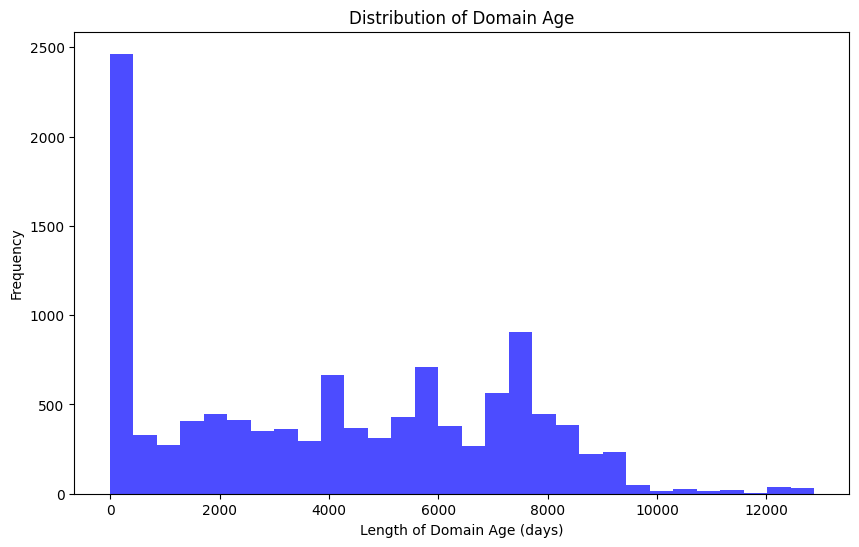

In [33]:
#distribution plot
plt.figure(figsize=(10,6))
plt.hist(data['domain_age'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Domain Age')
plt.xlabel('Length of Domain Age (days)')
plt.ylabel('Frequency')
plt.show()


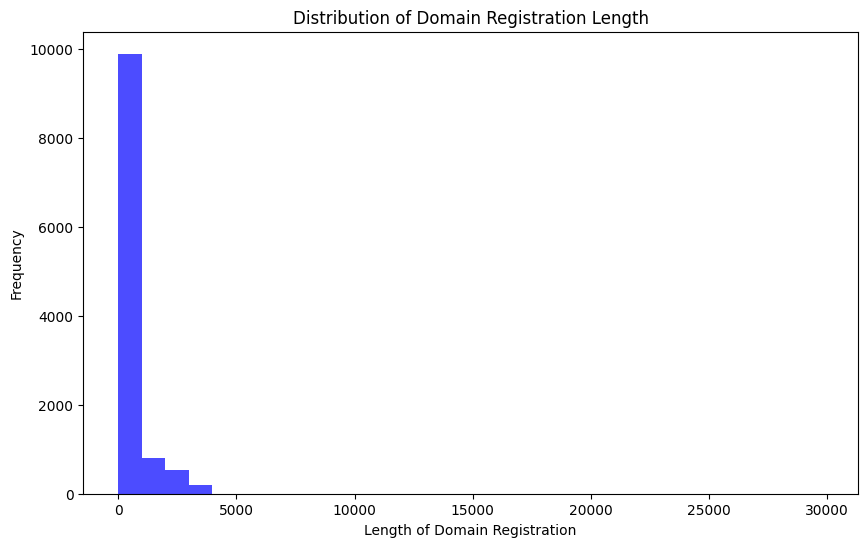

In [34]:
plt.figure(figsize=(10,6))
plt.hist(data['domain_registration_length'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Domain Registration Length')
plt.xlabel('Length of Domain Registration')
plt.ylabel('Frequency')
plt.show()



In [75]:
#use meadian to fill negative values
data['domain_age'] = data['domain_age'].apply(lambda x: data['domain_age'].median() if x < 0 else x)
data['domain_registration_length'] = data['domain_registration_length'].apply(lambda x: data['domain_registration_length'].median() if x < 0 else x)

In [36]:
data.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.00000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,0.322660,0.006649,0.123097,4.289589,0.000700,1.027909,0.004024,0.062292,0.001925,0.034821,0.448469,0.127997,0.006562,0.016710,0.610936,0.053137,0.025024,0.000350,0.002362,0.065617,0.050131,0.021610,2.231671,0.202450,0.083290,0.123447,0.000175,0.498250,0.003150,6.232808,2.927472,3.127297,5.019773,2.398950,15.393876,10.467979,10.561505,7.258882,7.678075,5.092425,0.327734,0.104199,0.004112,0.004899,0.017935,0.059755,87.189764,0.602457,0.276720,0.0,0.784864,0.0,0.158926,0.0,0.062469,0.063605,0.442170,51.978211,0.0,42.870444,23.236293,0.0,0.001312,0.006037,37.063922,0.001137,0.00140,0.124759,0.775853,0.439545,0.072878,493.510149,4704.454856,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,1.093336,0.081274,1.466450,1.882251,0.026448,0.240325,0.103240,0.598190,0.077111,0.375576,0.501912,0.379008,0.080742,0.169358,0.487559,0.089363,0.093422,0.018705,0.048547,0.247622,0.218225,0.145412,0.637069,0.401843,0.276332,0.328964,0.013227,0.691907,0.056035,5.572355,4.768936,2.211571,3.941580,2.997809,22.083644,4.932015,23.077883,4.145827,3.578435,7.147050,0.842600,0.305533,0.063996,0.069827,0.132722,0.331266,166.758254,0.376474,0.319958,0.0,2.758802,0.0,0.266437,0.0,0.156209,0.244058,0.496666,41.523144,0.0,46.249897,38.386577,0.0,0.036204,0.077465,39.073385,0.033707,0.03739,0.330460,0.417038,0.496353,0.259948,814.322123,2567.666099,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000

### Modeling 

In [76]:
label_encoder = LabelEncoder()
data['status'] = label_encoder.fit_transform(data['status'])

data['status'].value_counts()

status
0    5715
1    5715
Name: count, dtype: int64

In [89]:
import re
import tldextract

In [95]:
!pip install transformers torch

  Using cached safetensors-0.6.2-cp38-abi3-win_amd64.whl.metadata (4.1 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.6 MB 2.0 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/11.6 MB 2.3 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/11.6 MB 1.9 MB/s eta 0:00:06
   --------- ------------------------------ 2.6/11.6 MB 2.7 MB/s eta 0:00:04
   --------- ------------------------------ 2.9/11.6 MB 2.8 MB/s eta 0:00:04
   ---------- ----------------------------- 3.1/11.6 MB 2.4 MB/s eta 0:00:04
   ---------------- ----------------------- 4.7/11.6 MB 2.8 MB/s eta 0:00:03
   ------------------ --------------------- 5.2/11.6 MB 2.8 MB/s eta 0:00:03
   -------------------- -----

In [142]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import joblib

# NLP
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Factor Graph
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation

import pickle

In [164]:

class HybridPhishingModel:
    def __init__(self, suspicious_keywords=None, top_tfidf_features=5):
    
        self.ml_models = {
            "random_forest": RandomForestClassifier(n_estimators=100, random_state=42),
            "gradient_boost": GradientBoostingClassifier(random_state=42),
            "logistic_regression": LogisticRegression(max_iter=500)
        }
        self.best_ml_model = None
        self.scaler = StandardScaler()
        self.selected_url_features = [
            'length_url', 'length_hostname', 'nb_dots', 'nb_hyphens', 'nb_at',
            'nb_qm', 'nb_slash', 'shortening_service', 'domain_in_brand',
            'brand_in_subdomain', 'brand_in_path', 'tld_in_path',
            'tld_in_subdomain', 'suspecious_tld', 'abnormal_subdomain',
            'prefix_suffix', 'random_domain', 'ratio_digits_url', 'ratio_digits_host',
            'nb_subdomains'
        ]
        # NLP
        self.use_nlp = True
        self.vectorizer = TfidfVectorizer(max_features=500)
        self.nlp_model = MultinomialNB()
        self.top_tfidf_features = top_tfidf_features
        # Factor graph
        self.factor_graph = None
        # Keywords
        if suspicious_keywords is None:
            self.suspicious_keywords = ['urgent', 'verify', 'password', 'suspended', 'click', 'bank', 'account']
        else:
            self.suspicious_keywords = suspicious_keywords
    # --------------------------
    # Prepare URL features
    # --------------------------
    def prepare_url_features(self, df):
        for f in self.selected_url_features:
            if f not in df.columns:
                df[f] = 0
        return df[self.selected_url_features]

    # --------------------------
    # Train ML
    # --------------------------
    def train_ml(self, df_url, target='status'):
        X_url = self.prepare_url_features(df_url)
        y_url = df_url[target]

        X_scaled = self.scaler.fit_transform(X_url)
        best_auc = 0
        for name, model in self.ml_models.items():
            auc = cross_val_score(model, X_scaled, y_url, cv=3, scoring='roc_auc').mean()
            print(f"{name}: CV AUC={auc:.4f}")
            if auc > best_auc:
                best_auc = auc
                self.best_ml_model = name
        self.ml_models[self.best_ml_model].fit(X_scaled, y_url)
        print(f"Selected ML model: {self.best_ml_model}")

    # --------------------------
    # Train NLP
    # --------------------------
    def train_nlp(self, df_text, text_col='TEXT', target='LABEL'):
        texts = df_text[text_col].astype(str)
        y_text = df_text[target]
        self.vectorizer.fit(texts)
        X_text = self.vectorizer.transform(texts)
        self.nlp_model.fit(X_text, y_text)

    # --------------------------
    # Build factor graph
    # --------------------------
    def build_factor_graph(self):
        self.factor_graph = MarkovNetwork()
        nodes = ['Hybrid']
        # ML feature nodes
        for f in self.selected_url_features:
            nodes.append(f"ML_{f}")
        # NLP node
        nodes.append('NLP_prob')
        # ML probability node
        nodes.append('ML_prob')
        # Top TF-IDF term nodes
        nodes += [f"TFIDF_{i}" for i in range(self.top_tfidf_features)]
        # Keyword nodes
        nodes += [f"KW_{kw}" for kw in self.suspicious_keywords]
        self.factor_graph.add_nodes_from(nodes)
        # Connect all factor nodes to Hybrid
        edges = [(f, 'Hybrid') for f in nodes if f != 'Hybrid']
        self.factor_graph.add_edges_from(edges)

    # --------------------------
    # Binning numerical URL features
    # --------------------------
    def bin_url_feature(self, feature):
        if feature == 0:
            return 0
        elif feature <= 2:
            return 1
        else:
            return 2

    # --------------------------
    # Fit hybrid model
    # --------------------------
    def fit(self, df_url=None, df_text=None):
        if df_url is not None:
            self.train_ml(df_url)
        if self.use_nlp and df_text is not None:
            self.train_nlp(df_text)
        elif self.use_nlp:
            print("No text dataset provided; NLP used only at prediction time.")
        self.build_factor_graph()

    # --------------------------
    # Predict per user input
    # --------------------------
    def predict_from_user_input(self, url_features_df, text_input, ml_weight=0.7, nlp_weight=0.3):
        # --- Step 1: ML probability ---
        X_scaled = self.scaler.transform(url_features_df[self.selected_url_features])
        ml_prob = self.ml_models[self.best_ml_model].predict_proba(X_scaled)[0, 1]

        # ML feature-level factors (binned)
        ml_factor_nodes = {}
        for f in self.selected_url_features:
            val = url_features_df[f].values[0]
            ml_factor_nodes[f"ML_{f}"] = min(int(val), 2)

        # --- Step 2: NLP probability ---
        if self.use_nlp:
            X_text = self.vectorizer.transform([text_input])
            text_prob = self.nlp_model.predict_proba(X_text)[0, 1]
            nlp_factor_node = 1 if text_prob >= 0.5 else 0
        else:
            text_prob = 0.0
            nlp_factor_node = 0

        # --- Step 3: Keyword factors ---
        keyword_factors = {}
        text_lower = text_input.lower()
        for kw in self.suspicious_keywords:
            keyword_factors[f"KW_{kw}"] = 1 if kw in text_lower else 0

        # --- Step 4: TF-IDF top terms factors ---
        tfidf_vector = self.vectorizer.transform([text_input]).toarray()[0]
        top_indices = np.argsort(tfidf_vector)[-self.top_tfidf_features:]
        tfidf_factors = {f"TFIDF_{i}": int(tfidf_vector[idx] > 0) for i, idx in enumerate(top_indices)}

        # --- Step 5: Create fresh factor graph ---
        fg = MarkovNetwork()
        fg.add_node('Hybrid')
        fg.add_node('ML_prob')
        fg.add_node('NLP_prob')
        for f in ml_factor_nodes.keys():
            fg.add_node(f)
        for kw in keyword_factors.keys():
            fg.add_node(kw)
        for tf in tfidf_factors.keys():
            fg.add_node(tf)

        # --- Step 6: Add factors ---
        factors = []

        # ML feature factors
        for f_node, val in ml_factor_nodes.items():
            p_legit = max(0.05, 0.9 - 0.3*val)  # higher val => more suspicious
            p_phish = 1 - p_legit
            values = [p_legit, p_phish, 1-p_legit, 1-p_phish]
            values = np.array(values) * ml_weight  # weighted by ML weight
            values = values / values.sum()
            factors.append(DiscreteFactor([f_node, 'Hybrid'], [2, 2], values=values))

        # ML probability factor (weighted)
        values_ml = [1-ml_prob, ml_prob, 1-ml_prob, ml_prob]
        values_ml = np.array(values_ml) * ml_weight
        values_ml = values_ml / values_ml.sum()
        factors.append(DiscreteFactor(['ML_prob', 'Hybrid'], [2, 2], values=values_ml))

        # NLP probability factor (weighted)
        values_nlp = [0.9 if nlp_factor_node==0 else 0.2,
                    0.1 if nlp_factor_node==0 else 0.8,
                    0.2 if nlp_factor_node==0 else 0.1,
                    0.8 if nlp_factor_node==0 else 0.9]
        values_nlp = np.array(values_nlp) * nlp_weight
        values_nlp = values_nlp / values_nlp.sum()
        factors.append(DiscreteFactor(['NLP_prob', 'Hybrid'], [2, 2], values=values_nlp))

        # Keyword factors
        for kw_node, val in keyword_factors.items():
            factors.append(DiscreteFactor([kw_node, 'Hybrid'], [2, 2],
                                        values=[0.9 if val==0 else 0.2,
                                                0.1 if val==0 else 0.8,
                                                0.2 if val==0 else 0.1,
                                                0.8 if val==0 else 0.9]))

        # TF-IDF factors
        for tf_node, val in tfidf_factors.items():
            factors.append(DiscreteFactor([tf_node, 'Hybrid'], [2, 2],
                                        values=[0.9 if val==0 else 0.2,
                                                0.1 if val==0 else 0.8,
                                                0.2 if val==0 else 0.1,
                                                0.8 if val==0 else 0.9]))

        # Add all factors
        fg.add_factors(*factors)

        # --- Step 7: Belief Propagation ---
        bp = BeliefPropagation(fg)
        hybrid_marginals = bp.query(variables=['Hybrid'], show_progress=False)
        hybrid_prob = hybrid_marginals.values[1]  # phishing probability

        # --- Step 8: Prediction ---
        prediction = 'phishing' if hybrid_prob >= 0.5 else 'legitimate'

        return {
            'prediction': prediction,
            'ml_prob': ml_prob,
            'text_prob': text_prob,
            'hybrid_prob': hybrid_prob,
            'keywords_detected': [kw for kw in self.suspicious_keywords if kw in text_lower]
        }


    # --------------------------
    # Save & load
    # --------------------------
    def save_components(self, filepath):
            components = {
                "ml_models": self.ml_models,
                "best_ml_model": self.best_ml_model,
                "scaler": self.scaler,
                "vectorizer": self.vectorizer,
                "nlp_model": self.nlp_model,
                "selected_url_features": self.selected_url_features
            }
            with open(filepath, "wb") as f:
                pickle.dump(components, f)
            print(f"Components saved to {filepath}")

    # --------------------------
    # Load components into a new class instance
    # --------------------------
    def load_components(self, filepath):
        with open(filepath, "rb") as f:
            components = pickle.load(f)
        self.ml_models = components["ml_models"]
        self.best_ml_model = components["best_ml_model"]
        self.scaler = components["scaler"]
        self.vectorizer = components["vectorizer"]
        self.nlp_model = components["nlp_model"]
        self.selected_url_features = components["selected_url_features"]
        print(f"Components loaded from {filepath}")


In [165]:
model = HybridPhishingModel()
model.fit(df_url=data, df_text=text_data)

model.save_components("hybrid_phishing_components.pkl")

random_forest: CV AUC=0.9207
gradient_boost: CV AUC=0.9031
logistic_regression: CV AUC=0.8568
Selected ML model: random_forest
Components saved to hybrid_phishing_components.pkl


In [167]:
model = HybridPhishingModel()

# Load components (safe in Jupyter)
model.load_components("hybrid_phishing_components.pkl")

# Example URL and text input
user_url = "http://bit.ly/suspicious-link"
user_text = "Your account has been suspended! Click here to verify your password urgently."

# Function to extract URL features
def extract_url_features(url, model):
    features = {}
    features['length_url'] = len(url)
    features['length_hostname'] = len(url.split('//')[-1].split('/')[0])
    features['nb_dots'] = url.count('.')
    features['nb_hyphens'] = url.count('-')
    features['nb_at'] = url.count('@')
    features['nb_qm'] = url.count('?')
    features['nb_slash'] = url.count('/')
    features['shortening_service'] = 1 if any(s in url for s in ['bit.ly','tinyurl','goo.gl']) else 0
    features['domain_in_brand'] = 0
    features['brand_in_subdomain'] = 0
    features['brand_in_path'] = 0
    features['tld_in_path'] = 0
    features['tld_in_subdomain'] = 0
    features['suspecious_tld'] = 0
    features['abnormal_subdomain'] = 0
    features['prefix_suffix'] = 0
    features['random_domain'] = 1 if any(c.isdigit() for c in url.split('//')[-1].split('.')[0]) else 0
    features['ratio_digits_url'] = sum(c.isdigit() for c in url) / max(len(url),1)
    features['ratio_digits_host'] = sum(c.isdigit() for c in url.split('//')[-1].split('/')[0]) / max(len(url.split('//')[-1].split('/')[0]),1)
    features['nb_subdomains'] = len(url.split('//')[-1].split('.')[0].split('-'))

    # Fill missing features
    for f in model.selected_url_features:
        if f not in features:
            features[f] = 0
    return pd.DataFrame([features])

# Prepare features
url_features_df = extract_url_features(user_url, model)


# --- ML probability ---
X_scaled = model.scaler.transform(url_features_df[model.selected_url_features])
ml_prob = model.ml_models[model.best_ml_model].predict_proba(X_scaled)[0,1]

# --- NLP probability ---
X_text = model.vectorizer.transform([user_text])
text_prob = model.nlp_model.predict_proba(X_text)[0,1]

# --- Weighted hybrid probability ---
ml_weight = 0.8  # give more importance to ML (URL features)
nlp_weight = 0.2  # less weight to NLP (text)
hybrid_prob = ml_prob*ml_weight + text_prob*nlp_weight

# --- Prediction ---
prediction = 'phishing' if hybrid_prob >= 0.5 else 'legitimate'

# --- Show results ---
print("Prediction result:")
print(f"Prediction: {prediction}")
print(f"ML probability: {ml_prob:.4f}")
print(f"Text probability: {text_prob:.4f}")
print(f"Weighted Hybrid probability: {hybrid_prob:.4f}")


Components loaded from hybrid_phishing_components.pkl
Prediction result:
Prediction: phishing
ML probability: 0.9400
Text probability: 0.0013
Weighted Hybrid probability: 0.7523
